<a href="https://www.kaggle.com/code/sanjay277/virat-kohli-centuries-analysis?scriptVersionId=125124421" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Accessing the data

In [2]:
df=pd.read_csv('/kaggle/input/virat-kohli-100s/Virat_Kohli_100s.csv')

In [3]:
df.columns

Index(['Number', 'Format', 'Inning', 'Position', 'Score', 'Balls',
       'Strike Rate', 'Against', 'Venue', 'Host Nation', 'Series', 'Year',
       'Team Total', 'Wickets lost', 'Not Out', 'MOTM', 'Win', 'Captain'],
      dtype='object')

In [4]:
df.columns = [x.lower() for x in df.columns]

In [5]:
df.rename(columns = {'strike rate':'strike_rate', 'host nation':'host_nation',
                     'team total':'team_total','wickets lost':'wickets_lost', 'not out': 'not_out'},inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        80 non-null     int64  
 1   format        80 non-null     object 
 2   inning        80 non-null     int64  
 3   position      80 non-null     object 
 4   score         80 non-null     int64  
 5   balls         80 non-null     int64  
 6   strike_rate   80 non-null     float64
 7   against       80 non-null     object 
 8   venue         80 non-null     object 
 9   host_nation   80 non-null     object 
 10  series        80 non-null     object 
 11  year          80 non-null     int64  
 12  team_total    80 non-null     int64  
 13  wickets_lost  80 non-null     int64  
 14  not_out       80 non-null     object 
 15  motm          80 non-null     object 
 16  win           80 non-null     object 
 17  captain       80 non-null     object 
dtypes: float64(1), int64(7), object(

In [7]:
df.describe()

,number,inning,score,balls,strike_rate,year,team_total,wickets_lost
count,80.0000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000,80.00000
mean,40.5000,1.67500,131.125000,149.875000,102.367119,2015.68750,338.900000,6.20000
std,23.2379,0.67082,35.314276,77.116446,38.908226,3.20835,116.954562,2.81227
min,1.0000,1.00000,100.000000,50.000000,34.915254,2009.00000,166.000000,1.00000
25%,20.7500,1.00000,107.000000,98.750000,74.364273,2013.00000,270.000000,4.00000
50%,40.5000,2.00000,117.000000,120.000000,96.733333,2016.00000,309.000000,6.00000
75%,60.2500,2.00000,139.250000,193.250000,117.263339,2018.00000,364.000000,9.00000
max,80.0000,4.00000,254.000000,366.000000,226.000000,2023.00000,687.000000,10.00000


## Checking for null values

In [8]:
df.isnull().sum()

number          0
format          0
inning          0
position        0
score           0
balls           0
strike_rate     0
against         0
venue           0
host_nation     0
series          0
year            0
team_total      0
wickets_lost    0
not_out         0
motm            0
win             0
captain         0
dtype: int64

<AxesSubplot:>

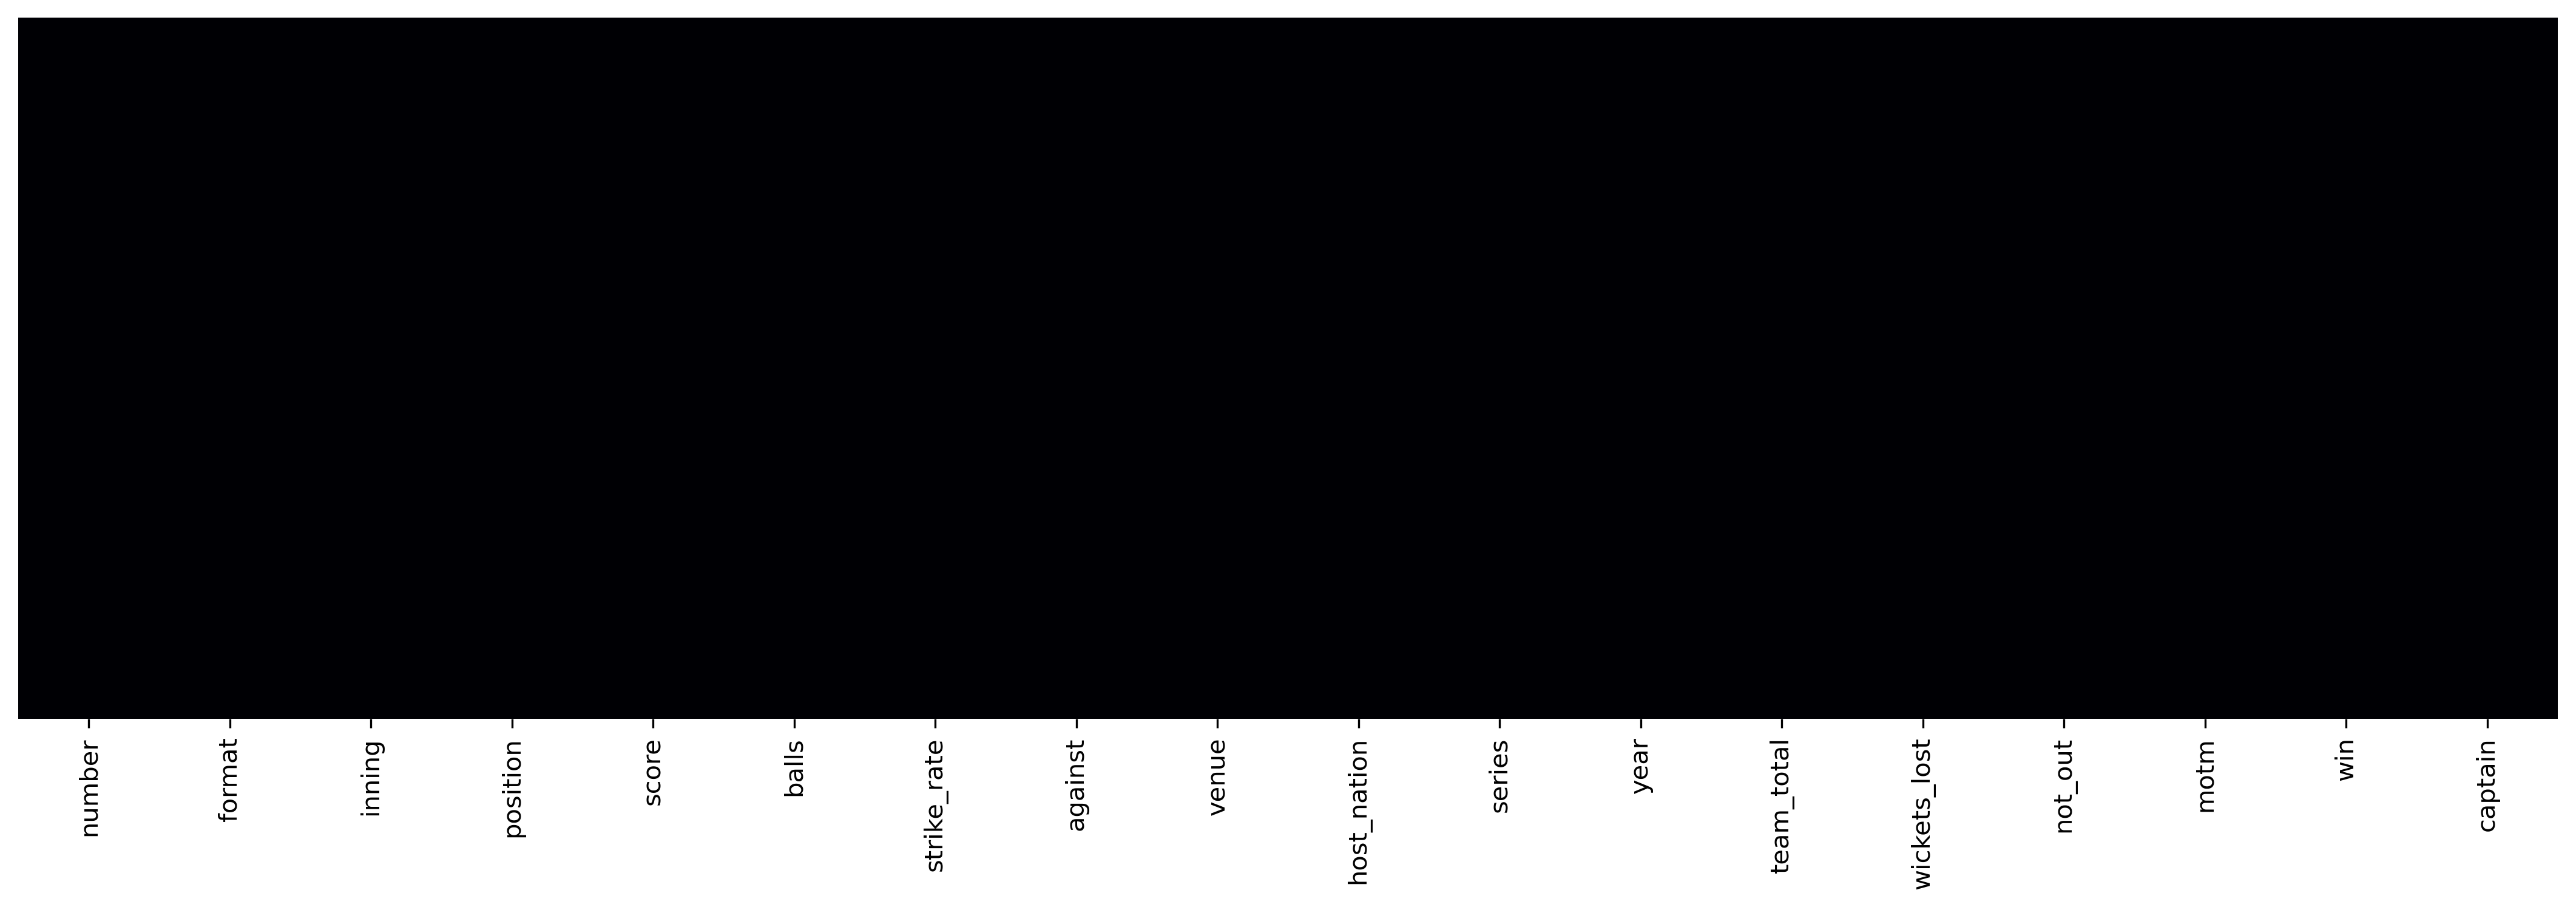

In [9]:
plt.figure(figsize=(18,5),dpi=300)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

#### No null values

In [10]:
## Checking Data types
df.dtypes

number            int64
format           object
inning            int64
position         object
score             int64
balls             int64
strike_rate     float64
against          object
venue            object
host_nation      object
series           object
year              int64
team_total        int64
wickets_lost      int64
not_out          object
motm             object
win              object
captain          object
dtype: object

In [11]:
#Converting important string column to numeric values
df=pd.get_dummies(df,columns=['not_out','motm','win','captain'])
df.drop(['not_out_No','motm_No','win_Drawn', 'win_No','win_Tie','captain_No'],axis=1,inplace=True)
df.rename(columns={'not_out_Yes':'not_out','motm_Yes':'motm','win_Yes':'win','captain_Yes':'captain'},inplace=True)
df.head(3) # 1-Yes 0-No

,number,format,inning,position,score,balls,strike_rate,against,venue,host_nation,series,year,team_total,wickets_lost,not_out,motm,win,captain
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,0,0,1,0
1,2,ODI,2,3,102,95,107.368421,Bangladesh,Mirpur,Bangladesh,Tri-Series,2010,249,4,1,1,1,0
2,3,ODI,2,3,118,121,97.520661,Australia,Vizag,India,Bilateral,2010,292,5,0,1,1,0


In [12]:
df.columns

Index(['number', 'format', 'inning', 'position', 'score', 'balls',
       'strike_rate', 'against', 'venue', 'host_nation', 'series', 'year',
       'team_total', 'wickets_lost', 'not_out', 'motm', 'win', 'captain'],
      dtype='object')

<AxesSubplot:>

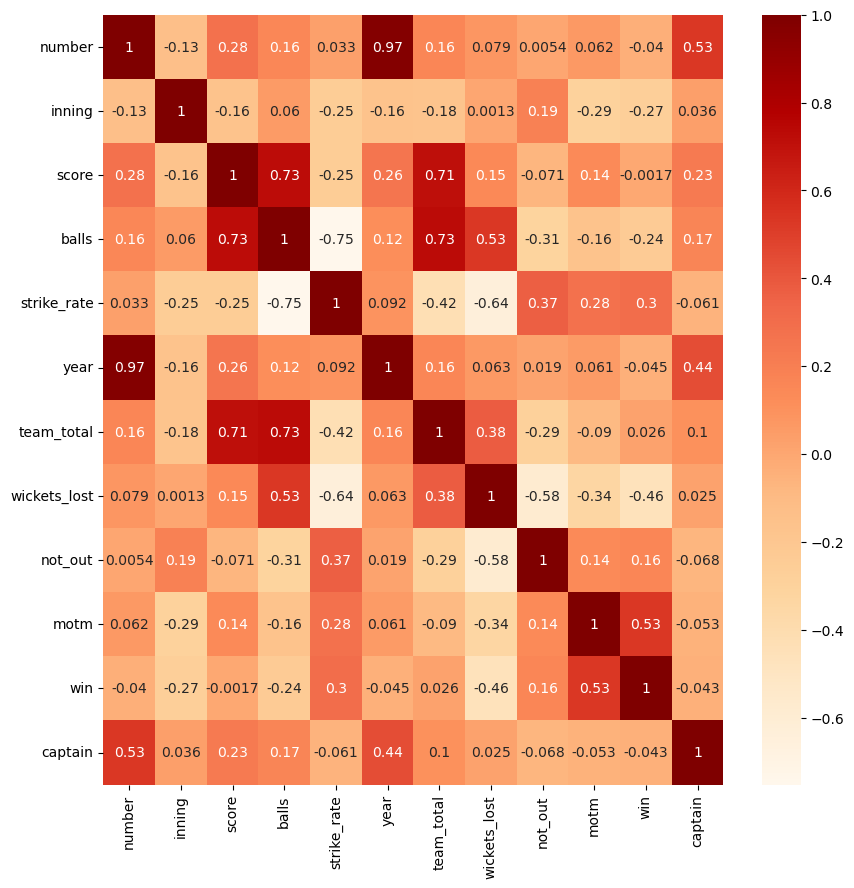

In [13]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap="OrRd",annot=True)

In [14]:
centuries=df.groupby('format').size()

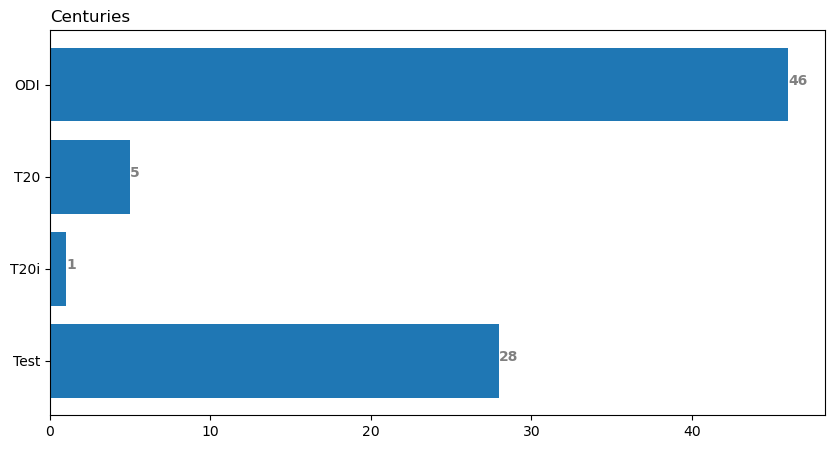

In [15]:
fig, ax = plt.subplots(figsize =(10, 5))

 
# Horizontal Bar Plot
ax.barh(centuries.index, centuries.values)

 
# Add annotation to bars
for i in ax.patches:
     plt.text(i.get_width(), i.get_y()+0.4,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')
 
# Show top values
ax.invert_yaxis()
 

# Add Plot Title
ax.set_title('Centuries',
             loc ='left')

 
# Show Plot
plt.show()

In [16]:
a=df[['format','strike_rate']]
print('IPL',a.loc[a['format'] == 'T20'].mean())
print('T20i',a.loc[df['format'] == 'T20i'].mean())
print('ODI',a.loc[df['format'] == 'ODI'].mean())
print('test',a.loc[df['format'] == 'Test'].mean())

IPL strike_rate    188.306533
dtype: float64
T20i strike_rate    200.0
dtype: float64
ODI strike_rate    113.521564
dtype: float64
test strike_rate    65.208748
dtype: float64


In [17]:
df.groupby(['format','inning']).count()[['number']]

number
format inning        
ODI    1           20
       2           26
T20    1            4
       2            1
T20i   1            1
Test   1            8
       2           15
       3            3
       4            2

In [18]:
df.groupby(['format','inning','position']).count()[['number']]

number
format inning position        
ODI    1      3             18
              4              2
       2      3             21
              4              5
T20    1      Open           4
       2      Open           1
T20i   1      Open           1
Test   1      4              8
       2      4             11
              5              3
              6              1
       3      4              3
       4      4              2

In [19]:
df.groupby(['against']).count()[['number']]

,number
against,
Afghanistan,1
Australia,16
Bangladesh,6
England,8
Gujarat Lions,2
Kings XI Punjab,1
Kolkata Knight Riders,1
New Zealand,8
Pakistan,2


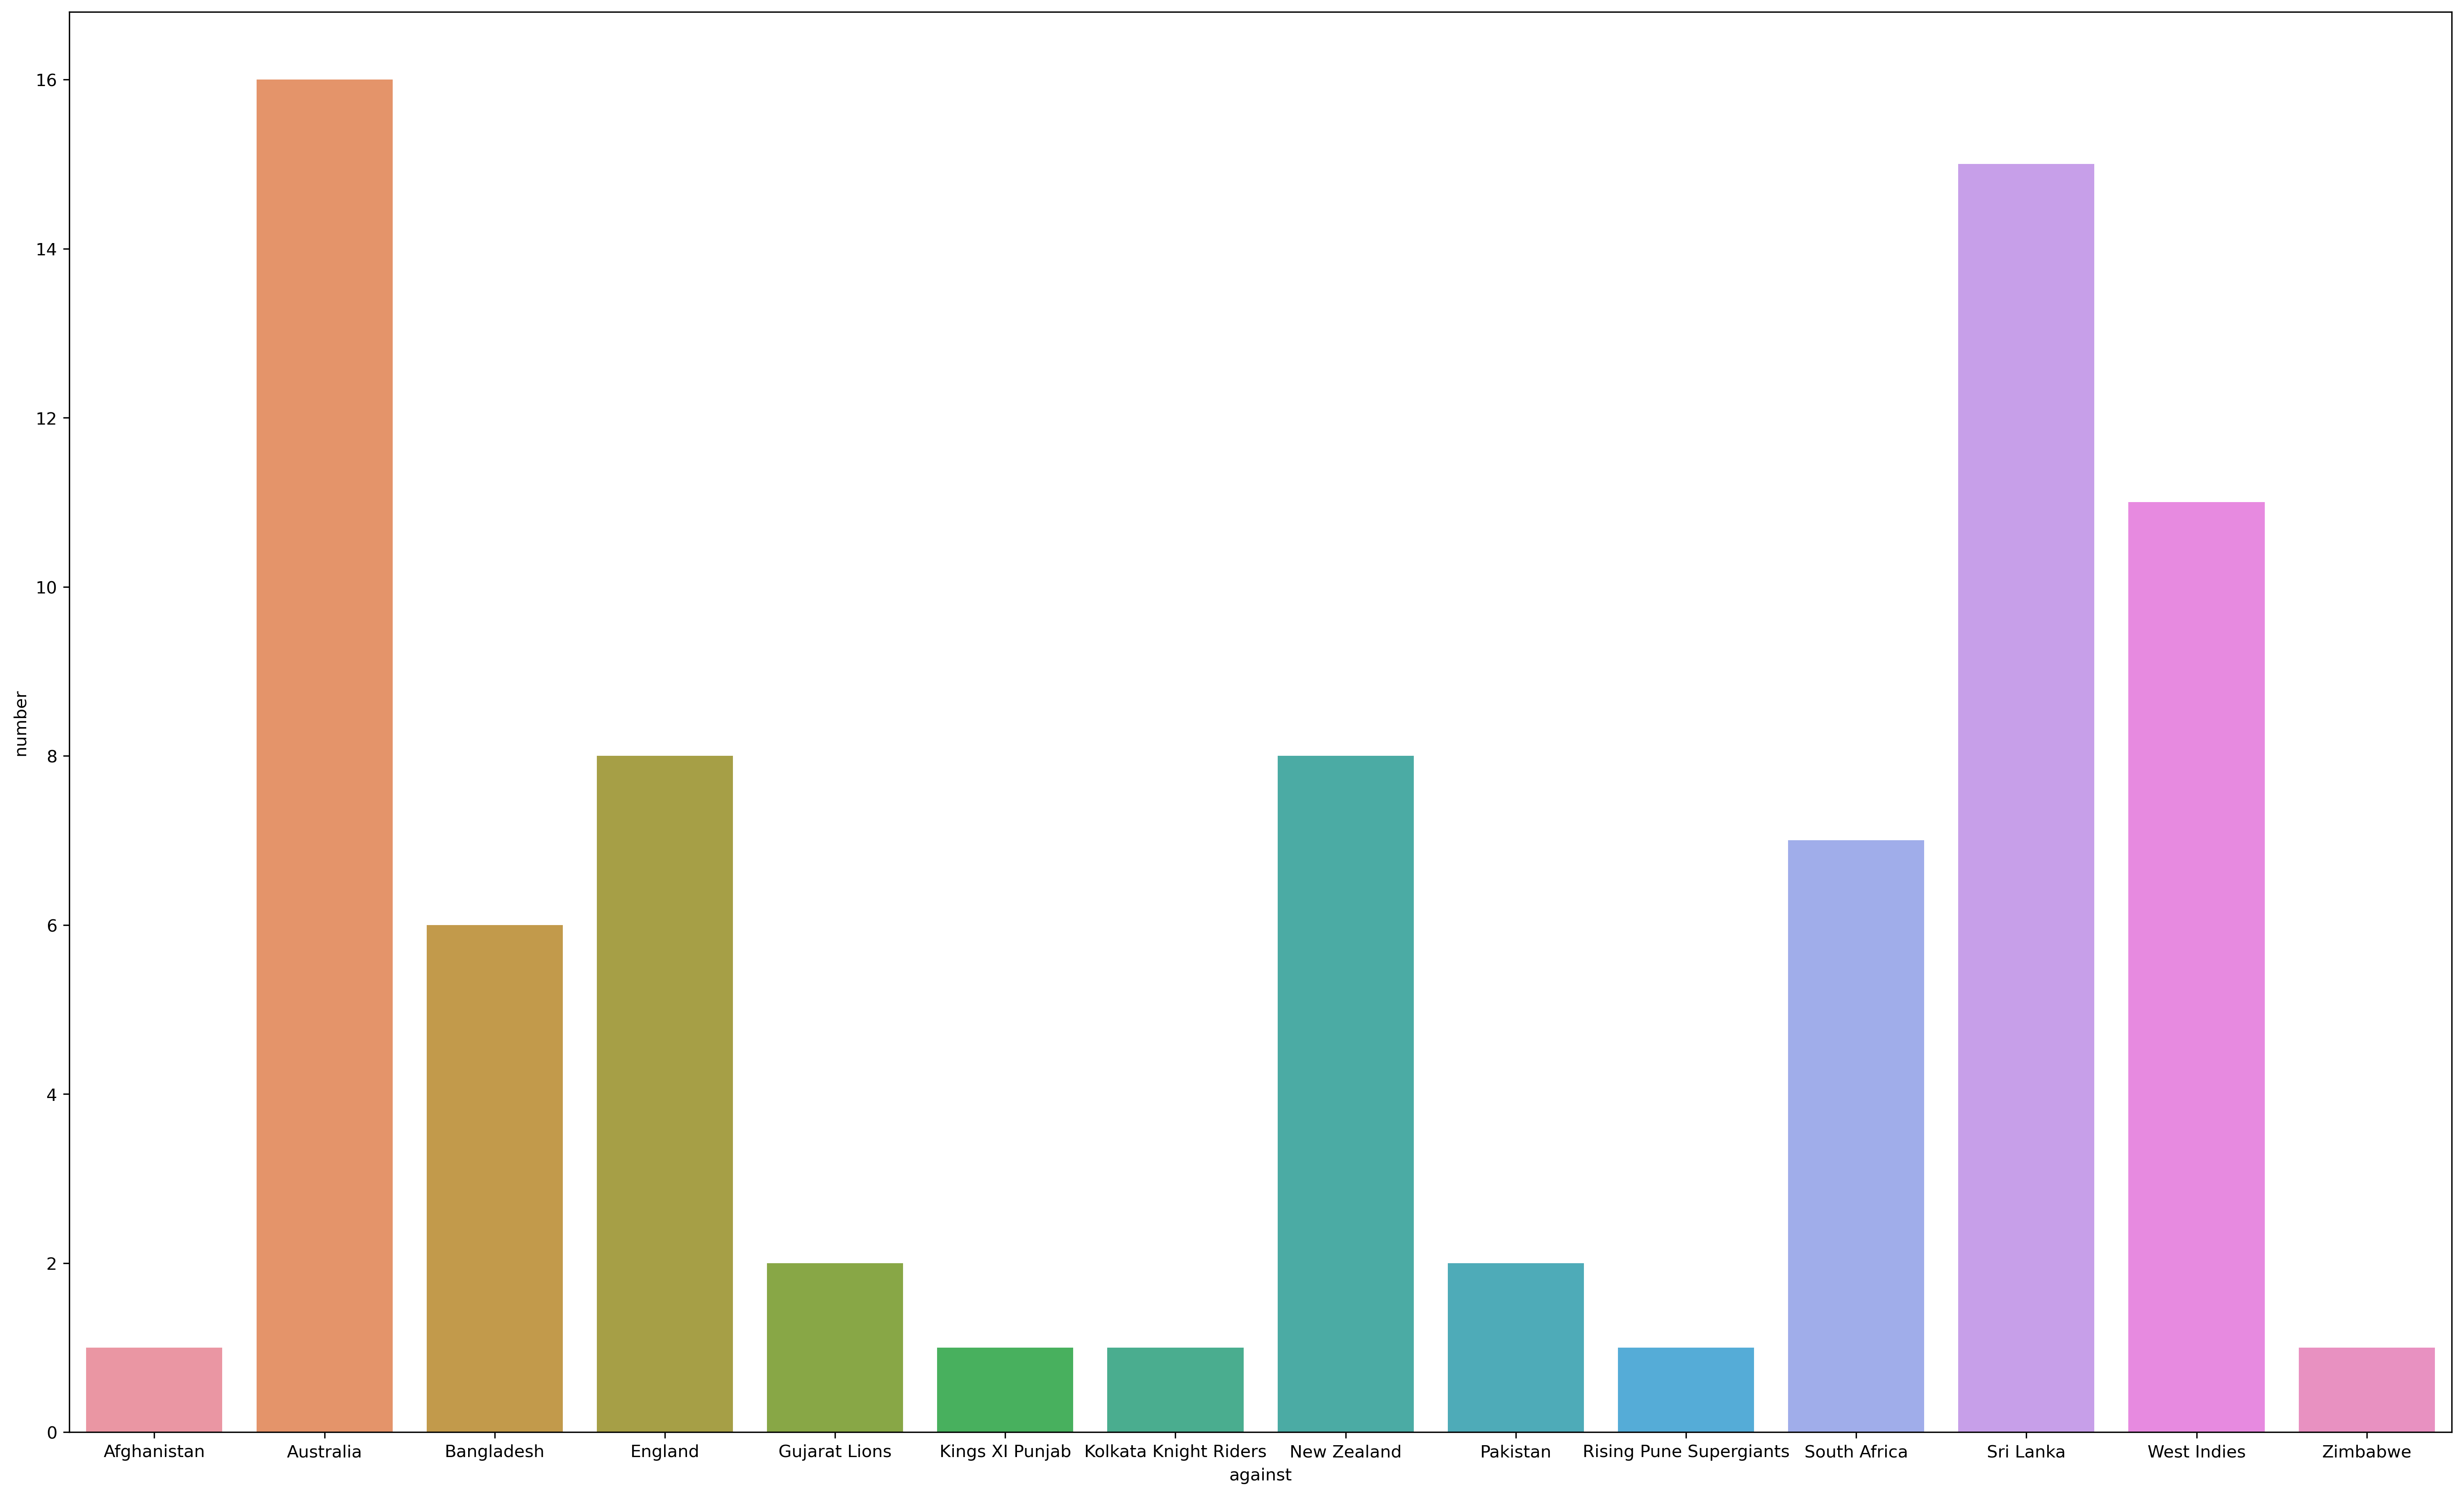

In [20]:
centuries=df.groupby(['against']).count()[['number']].reset_index()

plt.figure(figsize=(25,15),dpi=300)
sns.barplot(x="against",y="number",data=centuries)
plt.show()

# Considering only countries

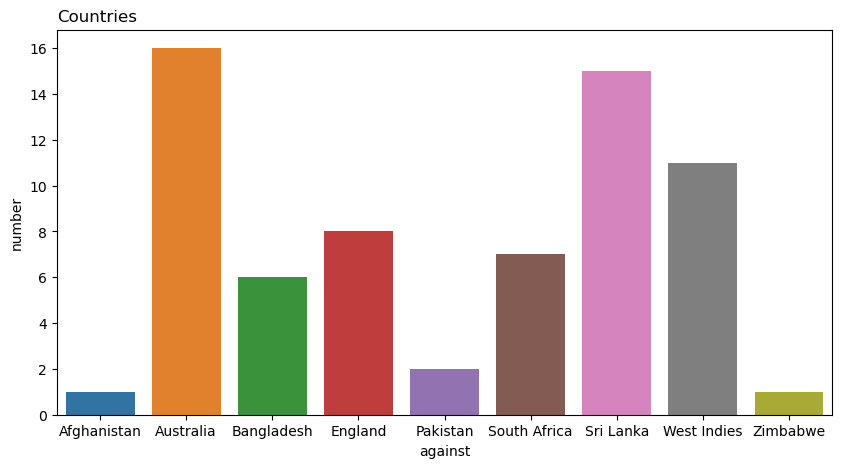

In [21]:
centuries.drop([4,5,6,7,9],inplace=True)
fig, ax = plt.subplots(figsize =(10, 5))
sns.barplot(x="against",y="number",data=centuries)
ax.set_title('Countries',
             loc ='left')
plt.show()

In [22]:
format=[]
against=[]
avg_strike_rate=[]
for i in df.loc[:,['format','against']]['format'].unique():
    for j in df.loc[:,['format','against']]['against'].unique():
        strike_rate_mean=df.loc[(df['format'] ==i) & (df['against'] == j)]['strike_rate'].mean()
        format.append(i)
        against.append(j)
        avg_strike_rate.append(strike_rate_mean)
country_cent=pd.DataFrame(list(zip(format,against,avg_strike_rate)),columns=['format','against','avg_strike_rate'])

In [23]:
country_cent.dropna(inplace=True)

country_cent.drop(country_cent[(country_cent['format'] == 'T20')].index, inplace=True)
country_cent.drop(country_cent[(country_cent['format'] =='T20i')].index, inplace=True) 


country_cent=country_cent.sort_values('against')
country_cent=country_cent.reset_index(drop=True)
country_cent

,format,against,avg_strike_rate
0,ODI,Australia,124.785708
1,Test,Australia,59.309686
2,ODI,Bangladesh,115.875396
3,Test,Bangladesh,76.514961
4,ODI,England,115.176651
5,Test,England,57.017241
6,ODI,New Zealand,106.020299
7,Test,New Zealand,62.931976
8,ODI,Pakistan,104.284642
9,ODI,South Africa,106.923252


In [24]:

format_cent=df.groupby(['format','against']).count()[['number']]
format_cent

number
format against                        
ODI    Australia                     8
       Bangladesh                    4
       England                       3
       New Zealand                   5
       Pakistan                      2
       South Africa                  4
       Sri Lanka                    10
       West Indies                   9
       Zimbabwe                      1
T20    Gujarat Lions                 2
       Kings XI Punjab               1
       Kolkata Knight Riders         1
       Rising Pune Supergiants       1
T20i   Afghanistan                   1
Test   Australia                     8
       Bangladesh                    2
       England                       5
       New Zealand                   3
       South Africa                  3
       Sri Lanka                     5
       West Indies                   2

In [25]:
new_format_cent=format_cent.drop(['T20','T20i'])
new_format_cent

number
format against             
ODI    Australia          8
       Bangladesh         4
       England            3
       New Zealand        5
       Pakistan           2
       South Africa       4
       Sri Lanka         10
       West Indies        9
       Zimbabwe           1
Test   Australia          8
       Bangladesh         2
       England            5
       New Zealand        3
       South Africa       3
       Sri Lanka          5
       West Indies        2

In [26]:
new_format_cent.reset_index(inplace=True)
new_format_cent.loc[len(new_format_cent.index)]=['Test','Zimbabwe',0]
new_format_cent.loc[len(new_format_cent.index)]=['Test','Pakistan',0]
new_format_cent=new_format_cent.sort_values('against')

new_format_cent=new_format_cent.reset_index(drop=True)
new_format_cent

,format,against,number
0,ODI,Australia,8
1,Test,Australia,8
2,ODI,Bangladesh,4
3,Test,Bangladesh,2
4,ODI,England,3
5,Test,England,5
6,ODI,New Zealand,5
7,Test,New Zealand,3
8,Test,Pakistan,0
9,ODI,Pakistan,2


In [27]:
fig=px.bar(new_format_cent,x='format', y='number', color='against')
fig.update_layout(height=700, width=700, title_text='Comparison of centuries \
in different formats against nations')
fig.show()


In [28]:
cent_strike_rate=new_format_cent.sort_values('against')
cent_strike_rate['strike_rate']=country_cent['avg_strike_rate']

#Correcting errors and replacing missing values
cent_strike_rate.loc[17,'strike_rate']=106.481482
cent_strike_rate.loc[8,'strike_rate']=np.nan

cent_strike_rate['strike_rate'] = cent_strike_rate['strike_rate'].fillna(0)
cent_strike_rate

,format,against,number,strike_rate
0,ODI,Australia,8,124.785708
1,Test,Australia,8,59.309686
2,ODI,Bangladesh,4,115.875396
3,Test,Bangladesh,2,76.514961
4,ODI,England,3,115.176651
5,Test,England,5,57.017241
6,ODI,New Zealand,5,106.020299
7,Test,New Zealand,3,62.931976
9,ODI,Pakistan,2,106.923252
8,Test,Pakistan,0,0.000000


In [29]:
print('Virat Kohli avg strike rate in ODI is',cent_strike_rate[cent_strike_rate['format']=='ODI']['strike_rate'].mean())
print('Virat Kohli avg strike rate in Test is',cent_strike_rate[cent_strike_rate['format']=='test']['strike_rate'].mean())

Virat Kohli avg strike rate in ODI is 98.63690167937963
Virat Kohli avg strike rate in Test is nan


In [30]:
fig=px.bar(cent_strike_rate,x='format', y='strike_rate',color='against')
fig.update_layout(height=700, width=700, title_text='Comparison of strike_rate \
in different formats against nations')
fig.show()


In [31]:
cent_nations=df.groupby(['format','host_nation']).count()[['number']].reset_index()
fig=px.bar(cent_nations,x='format',y='number',color='host_nation')
fig.update_layout(height=700,width=700,title_text='Centuries in different nations')
fig.show()

In [32]:
ven_cent=df.groupby(['format','venue']).count()[['number']].sort_values('venue').reset_index()


ven_cent=ven_cent.sort_values(by='number',ascending=False)
fig=px.bar(ven_cent,x='venue',y='number',color='format')

fig.update_layout(title_text='Centuries in different venues across formats')
fig.show()

In [33]:
df['freq_count'] = df.groupby('score')['score'].transform('count')

In [34]:
df.head(1)

,number,format,inning,position,score,balls,strike_rate,against,venue,host_nation,series,year,team_total,wickets_lost,not_out,motm,win,captain,freq_count
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,0,0,1,0,5


## Finding the score a at which Virat Kohli has been dismissed most times after scoring a century across formats

In [35]:
df.query('freq_count==5 and not_out==0')

,number,format,inning,position,score,balls,strike_rate,against,venue,host_nation,series,year,team_total,wickets_lost,not_out,motm,win,captain,freq_count
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,0,0,1,0,5
5,6,ODI,1,4,107,93,115.053763,England,Cardiff,England,Bilateral,2011,304,6,0,0,0,0,5
14,15,Test,2,5,103,193,53.367876,New Zealand,Bengaluru,India,Bilateral,2012,353,10,0,1,1,0,5
15,16,Test,2,5,103,295,34.915254,England,Nagpur,India,Bilateral,2012,326,9,0,0,0,0,5
16,17,Test,2,5,107,206,51.941748,Australia,Chennai,India,Bilateral,2013,572,10,0,0,1,0,5
31,32,ODI,1,3,107,126,84.920635,Pakistan,Adelaide,Australia,World Cup,2015,300,7,0,1,1,0,5
32,33,Test,2,4,103,191,53.926702,Sri Lanka,Galle,Sri Lanka,Bilateral,2015,375,10,0,0,0,1,5
61,62,Test,3,4,103,197,52.284264,England,Nottingham,England,Bilateral,2018,352,7,0,1,1,1,5
65,66,ODI,2,3,107,119,89.915966,West Indies,Pune,India,Bilateral,2018,240,10,0,0,0,1,5


In [36]:
df.query('freq_count==4 and not_out==0 and score!=107 and score!=103')

,number,format,inning,position,score,balls,strike_rate,against,venue,host_nation,series,year,team_total,wickets_lost,not_out,motm,win,captain,freq_count
39,40,T20,1,Open,113,50,226.000000,Kings XI Punjab,Bengaluru,India,IPL,2016,211,3,0,1,1,1,4
52,53,ODI,1,3,113,106,106.603774,New Zealand,Kanpur,New Zealand,Bilateral,2017,337,6,0,1,1,1,4
70,71,T20,1,Open,100,58,172.413793,Kolkata Knight Riders,Kolkata,India,IPL,2019,213,4,0,1,1,1,4
76,77,ODI,1,3,113,91,124.175824,Bangladesh,Chattogram,Bangladesh,Bilateral,2022,409,8,0,0,1,0,4
77,78,ODI,1,3,113,87,129.885057,Sri Lanka,Guwahati,India,Bilateral,2023,373,7,0,1,1,0,4


In [37]:
print('Average team score in test when Virat scores a double century',df.query('score>200')['team_total'].mean())
print('Average team total when Virat scores a century in ODI',df[df['format']=='ODI']['team_total'].mean())
print('Average team total when Virat scores a century in T20',df[df['format']=='T20']['team_total'].mean())

Average team score in test when Virat scores a double century 603.6666666666666
Average team total when Virat scores a century in ODI 299.82608695652175
Average team total when Virat scores a century in T20 209.4
